In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip iccad2_modified.zip

Streaming output truncated to the last 5000 lines.
  inflating: iccad2_modified/validation/test_NHS/NHSCAD2437.png1.png  
  inflating: __MACOSX/iccad2_modified/validation/test_NHS/._NHSCAD2437.png1.png  
  inflating: iccad2_modified/validation/test_NHS/NNHSCAD24346.png3.png  
  inflating: __MACOSX/iccad2_modified/validation/test_NHS/._NNHSCAD24346.png3.png  
  inflating: iccad2_modified/validation/test_NHS/NNHSCAD21048.png1.png  
  inflating: __MACOSX/iccad2_modified/validation/test_NHS/._NNHSCAD21048.png1.png  
  inflating: iccad2_modified/validation/test_NHS/NNHSCAD22972.png7.png  
  inflating: __MACOSX/iccad2_modified/validation/test_NHS/._NNHSCAD22972.png7.png  
  inflating: iccad2_modified/validation/test_NHS/NHSCAD244.png8.png  
  inflating: __MACOSX/iccad2_modified/validation/test_NHS/._NHSCAD244.png8.png  
  inflating: iccad2_modified/validation/test_NHS/NNHSCAD2841.png1.png  
  inflating: __MACOSX/iccad2_modified/validation/test_NHS/._NNHSCAD2841.png1.png  
  inflating: iccad2

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
folder = 'iccad2_modified'

In [ ]:
base_dir = os.path.join(os.path.dirname(folder), 'iccad2_modified')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# directory with our training hotspot pictures
train_hotspot_dir = os.path.join(train_dir, 'Hotspot')  

# directory with our training non-hotspot pictures
train_not_hotspot_dir = os.path.join(train_dir, 'Not_Hotspot')  

# directory with our validation hotspot pictures
validation_hotspot_dir = os.path.join(validation_dir, 'test_HS')

 # directory with our non-hotspot pictures
validation_not_hotspot_dir = os.path.join(validation_dir, 'test_NHS')

In [ ]:
num_hs_tr = len(os.listdir(train_hotspot_dir))
num_nhs_tr = len(os.listdir(train_not_hotspot_dir))

num_hs_val = len(os.listdir(validation_hotspot_dir))
num_nhs_val = len(os.listdir(validation_not_hotspot_dir))

total_train = num_hs_tr + num_nhs_tr
total_val = num_hs_val + num_nhs_val

print('The dataset contains:')
print('\u2022 {:,} training images'.format(total_train))
print('\u2022 {:,} validation images'.format(total_val))

print('\nThe training set contains:')
print('\u2022 {:,} images with hotspot'.format(num_hs_tr))
print('\u2022 {:,} images without hotspot'.format(num_nhs_tr))

print('\nThe validation set contains:')
print('\u2022 {:,} images with hotspot'.format(num_hs_val))
print('\u2022 {:,} images without hotspot'.format(num_nhs_val))

The dataset contains:
• 5,461 training images
• 41,798 validation images

The training set contains:
• 175 images with hotspot
• 5,286 images without hotspot

The validation set contains:
• 499 images with hotspot
• 41,299 images without hotspot


Found 5459 images belonging to 2 classes.


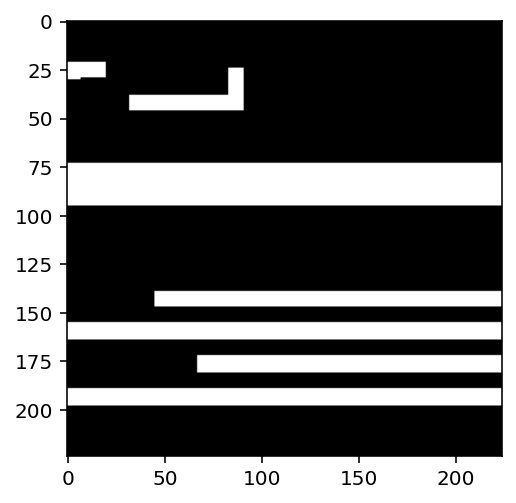

In [ ]:
BATCH_SIZE = 64
IMG_SHAPE  = 224

image_gen = ImageDataGenerator(rescale=1./255)

train_data_gen = image_gen.flow_from_directory(directory=train_dir,
                                          batch_size=BATCH_SIZE,
                                          shuffle=True,
                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                          class_mode='binary')

plt.imshow(train_data_gen[0][0][0])
plt.show()

Found 41796 images belonging to 2 classes.


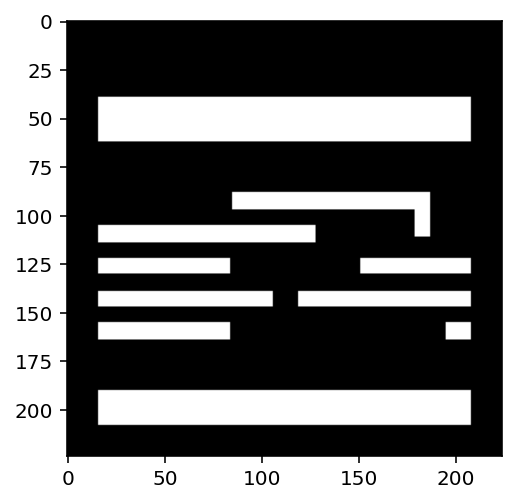

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(directory=validation_dir,
                                                 batch_size=BATCH_SIZE,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')
plt.imshow(val_data_gen[0][0][0])
plt.show()

In [ ]:
layer_neurons = [2048, 1024, 512, 256, 128, 56, 28, 14]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (IMG_SHAPE, IMG_SHAPE, 3)))

for neurons in layer_neurons:
    model.add(tf.keras.layers.Dense(neurons, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
            
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150528)            0         
_________________________________________________________________
dense (Dense)                (None, 2048)              308283392 
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
EPOCHS = 20

history = model.fit_generator(train_data_gen,
                              epochs=EPOCHS,
                              validation_data=val_data_gen)

Epoch 1/20
86/86 [==============================] - 291s 3s/step - loss: 5.6129 - accuracy: 0.3266 - val_loss: 1.0943 - val_accuracy: 0.9881
Epoch 2/20
86/86 [==============================] - 289s 3s/step - loss: 1.2064 - accuracy: 0.7038 - val_loss: 0.4293 - val_accuracy: 0.9881
Epoch 3/20
86/86 [==============================] - 289s 3s/step - loss: 0.7786 - accuracy: 0.8230 - val_loss: 0.1473 - val_accuracy: 0.9881
Epoch 4/20
86/86 [==============================] - 289s 3s/step - loss: 0.4371 - accuracy: 0.9115 - val_loss: 0.1118 - val_accuracy: 0.9881
Epoch 5/20
86/86 [==============================] - 290s 3s/step - loss: 0.3481 - accuracy: 0.9251 - val_loss: 0.0862 - val_accuracy: 0.9881
Epoch 6/20
86/86 [==============================] - 286s 3s/step - loss: 0.3172 - accuracy: 0.9302 - val_loss: 0.0752 - val_accuracy: 0.9881
Epoch 7/20
86/86 [==============================] - 287s 3s/step - loss: 0.2269 - accuracy: 0.9515 - val_loss: 0.0746 - val_accuracy: 0.9881
Epoch 8/20
86

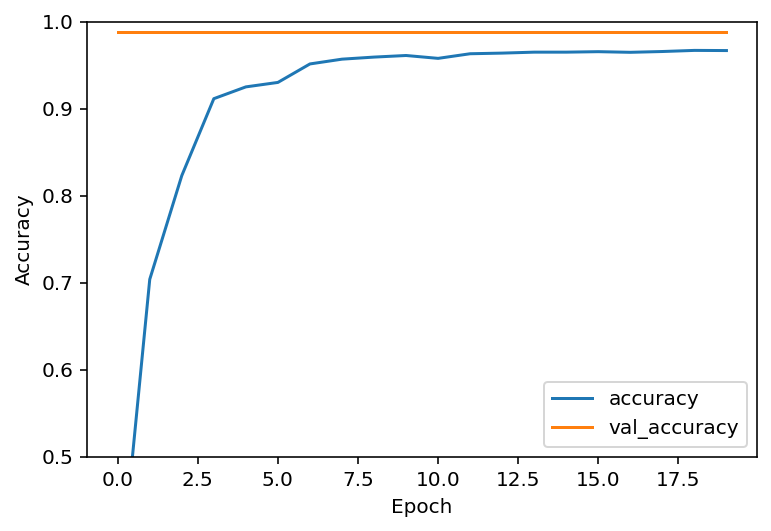

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
